<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_DBSCAN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial uses codes from these sources, with several adjustments:
- https://www.kdnuggets.com/2022/08/implementing-dbscan-python.html

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names=names)
# print(dataset.describe())
dataset_attr = dataset[['sepal-length','sepal-width','petal-length','petal-width']]
print(dataset_attr.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
# Do the DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(dataset_attr)
output = dbscan.labels_
print(output)

DBSCAN_data = dataset_attr.copy()
DBSCAN_data.loc[:,'Cluster'] = dbscan.labels_

unique, counts = np.unique(output, return_counts=True)
print(dict(zip(unique, counts)))

print(DBSCAN_data.Cluster.value_counts().to_frame())

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
{-1: 13, 0: 49, 1: 84, 2: 4}
    Cluster
 1       84
 0       49
-1       13
 2        4


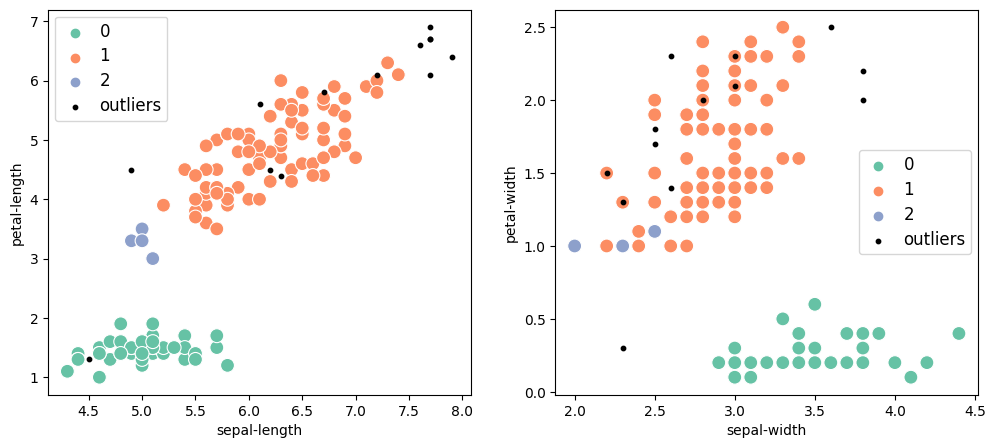

In [4]:
# Plot DBSCAN result
outliers = DBSCAN_data[DBSCAN_data['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x='sepal-length', y='petal-length',
                data=DBSCAN_data[DBSCAN_data['Cluster']!=-1], hue='Cluster',
                ax=axes[0], palette='Set2', legend='full', s=100)
sns.scatterplot(x='sepal-width', y='petal-width',
                data=DBSCAN_data[DBSCAN_data['Cluster']!=-1], hue='Cluster',
                ax=axes[1], palette='Set2', legend='full', s=100)
axes[0].scatter(outliers['sepal-length'], outliers['petal-length'], s=10, label='outliers', c='k')
axes[1].scatter(outliers['sepal-width'], outliers['petal-width'], s=10, label='outliers', c='k')
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')
plt.show()

In [5]:
# Evaluating DBSCAN results
silhouette_score(DBSCAN_data, DBSCAN_data['Cluster'])

0.5324814198416132